___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://d33wubrfki0l68.cloudfront.net/4ec62c1c925a380c912ddad740d18554c6822a11/fabe4/img/sponsors/iteso-university.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Integrante 1: Daniel Pastrana. Integrante 2: Mario García.

**Fecha:** 07 de noviembre del 2023.

**Expediente** : 733982. 740322.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Proyecto TEMA-2

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Los_Angeles_Lakers_logo.svg/1280px-Los_Angeles_Lakers_logo.svg.png" width="300px" height="100px" />


# Lakers Season Prediction
> Para este proyecto, utilizaremos la simulación para predecir el éxito en la siguiente temporada del equipo de la NBA, Los Angeles Lakers. Este proyecto se centrará en predecir si el equipo alcanzará las finales. La simulación se realizará tomando en cuenta cuatro nodos o variables, obtenidos de las estadísticas del equipo desde la temporada 2000-01.

## Objetivos.

### Objetivo general

> - Obtener el récord que tendrán los Lakers en temporada regular en la NBA el siguiente año.

#### Objetivos específicos

> - Sacar la correlación entre los puntos y el porcentaje de efectividad de tiros 3 puntos de los Lakers.
> - Sacar la correlación entre los puntos del rival y los rebotes de los Lakers.
> - Simular los puntos por partido que anotarán los Lakers.
> - Simular los puntos por partido que recibirán los Lakers.
> - Simular el porcentaje de efectividad en los intentos de tiro de 3 puntos de los Lakers.
> - Simular los rebotes que conseguirán los Lakers.


## Definición del problema

> El problema a trabajar es hacer una predicción sobre la temporada del equipo de baloncesto Los Angeles Lakers, esta predicción será para la temporada 2023-24 y buscará obtener su récord en temporada regular (partidos ganados/perdidos). Para la resolución del problema se tomará en cuenta las estadísticas de temporada regular y de postemporada de los últimos 4 años, lo que nos da un total de 352 partidos. Aunque la predicción solo será sobre el récord del equipo en temporada regular, los datos de playoffs también nos pueden servir al reflejar el nivel del equipo y su regularidad.


### 1.4 Nodos y variables que se decidieron simular y porqué

> - Puntos por partido de los Lakers.
> - Puntos por partido del rival de los Lakers.
> - Porcentaje de tiros de tres de los Lakers.
> - Rebotes de los Lakers.

> Elegimos los primeros dos nodos ya que lo más importante al final de todo son los puntos que hacen los equipos. El tercer nodo lo escogemos ya que el tiro de 3 puntos es cada vez más importante en el baloncesto, por lo que nos parece una variable importante. Y el último nodo lo escogemos porque los rebotes son la estadística que más refleja el juego en defensiva de un equipo.

### 1.5 Definición de hipótesis y supuestos.

> #### Supuestos:
> - Los Lakers tendrán a sus 2 super estrellas para la próxima temporada (Lebron James y Anthony Davis).
> - Se jugarán 82 partidos en temporada regular.
> - No se ha implementado o modificado ninguna regla dentro de la NBA.

> #### Hipótesis:
> - El porcentaje de tiro de 3 y los puntos están correlacionados.
> - Los rebotes y los puntos del rival están correlacionaods.
> - Los Lakers acabarán con un récord positivo la temporada (más victorias que derrotas).

### 1.6 Obtención de bases de datos

> Nuestros datos los obtuvimos de las páginas Basketball Reference y del sitio web de la NBA

### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st     
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from scipy import optimize

from scipy import stats
from scipy.stats import pearsonr

from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Lakers_Stats.csv")
df

,Date,Result,LAL Points,Opp points,LAL 3P%,REB
0,"Tue, Oct 22, 2019",L,102,112,39.4,41
1,"Fri, Oct 25, 2019",W,95,86,30.8,42
2,"Sun, Oct 27, 2019",W,120,101,35.5,47
3,"Tue, Oct 29, 2019",W,120,91,26.9,54
4,"Fri, Nov 1, 2019",W,119,110,28.1,41
...,...,...,...,...,...,...
347,"Fri, May 12, 2023",W,122,101,50.0,46
348,"Tue, May 16, 2023",L,126,132,45.8,30
349,"Thu, May 18, 2023",L,103,108,26.7,40
350,"Sat, May 20, 2023",L,108,119,31.3,45


In [3]:
lal_pts = df["LAL Points"]
three_pts = df["LAL 3P%"]
opp_pts = df["Opp points"]
reb = df["REB"]

## Nodo 1: Puntos de los Lakers por partido

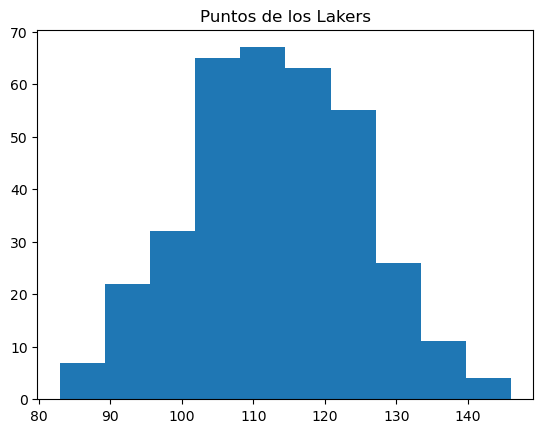

In [4]:
plt.hist(lal_pts)
plt.title("Puntos de los Lakers")
plt.show()

### KDE nodo 1

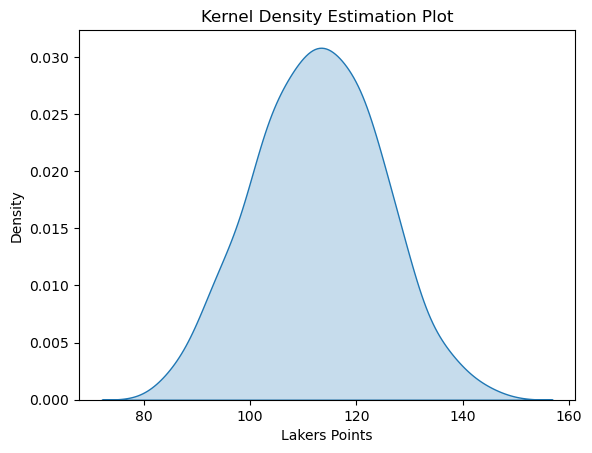

In [5]:
sns.kdeplot(data = lal_pts, shade = True)
plt.title("Kernel Density Estimation Plot")
plt.xlabel("Lakers Points")
plt.ylabel("Density")
plt.show()

### Distribución óptima para el nodo 1

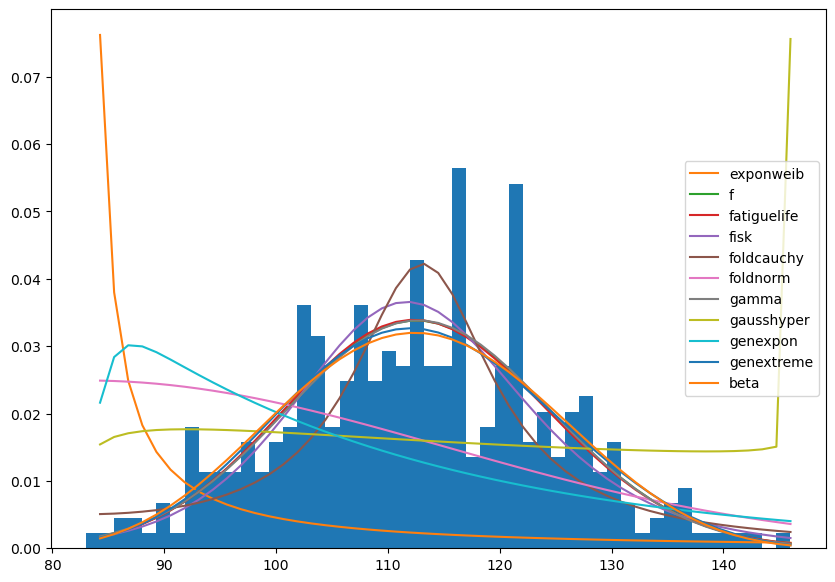

In [6]:
rv_continuas = [d_i for d_i in dir(st) if isinstance(getattr(st, d_i), getattr(st, 'rv_continuous'))]

fig, ax = plt.subplots(1, 1, figsize = (10,7))

y, x, _ = ax.hist(lal_pts, bins = 50, density = True)
x = x[1:]

error = pd.DataFrame(columns = ['distribucion', 'error'])
i = 0
for d_i in rv_continuas[20:30] + ['beta']:
    try:
        params = getattr(st, d_i).fit(lal_pts)
        data_hat = getattr(st, d_i).pdf(x, *params)
        ax.plot(x, data_hat, label=d_i)
        error.loc[i, :] = [d_i, np.mean((y - data_hat)**2)]
        i += 1
    except ValueError:
        pass

plt.legend()
error.set_index('distribucion', inplace=True)
error.sort_values('error', inplace=True)

In [7]:
error

,error
distribucion,
beta,0.000059
gamma,0.000059
f,0.000059
genextreme,0.000059
fatiguelife,0.000059
fisk,0.000065
foldcauchy,0.000084
foldnorm,0.000204
genexpon,0.000259


**La distribución beta es la que menos error tiene. Para saber si se acopla a nuestros datos haremos una comprobación.**

### Prueba de hipótesis nodo 1

**Hipótesis para beta**

$H_{0}$: es una distribución beta.

$H_{a}$: no es una distribución beta.

Nivel de significancia: ${\alpha} = 0.05$

Nivel de confianza: $1-{\alpha} = 0.95$

In [8]:
params_lalpts = st.beta.fit(lal_pts)
params_lalpts

(6.239369098198521, 6.860205650726678, 70.53068620068866, 88.71703654494223)

In [9]:
st.kstest(lal_pts, lambda lal_pts: st.beta.cdf(lal_pts, * params_lalpts))

KstestResult(statistic=0.02847278432642808, pvalue=0.9299178389543874)

**El p-value que tenemos es muy grande, por lo que podemos aceptar la hipótesis nula, entonces los puntos que anotan los Lakers sí se distribuyen como beta.**

### Ajuste PDF nodo 1

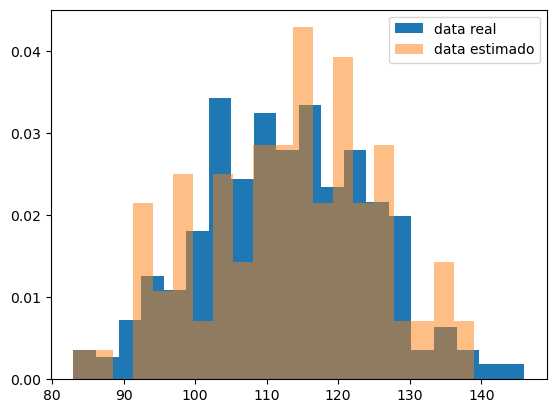

In [10]:
dist = 'beta'
params1 = getattr(st, dist).fit(lal_pts)

random_hat1 = getattr(st, dist).rvs(*params1, size = 100)

plt.hist(lal_pts, bins = 20, label = 'data real', density = True)
plt.hist(random_hat1, bins = 20, density = True, alpha = .5, label = 'data estimado')
plt.legend()
plt.show()

### Q-Q nodo 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


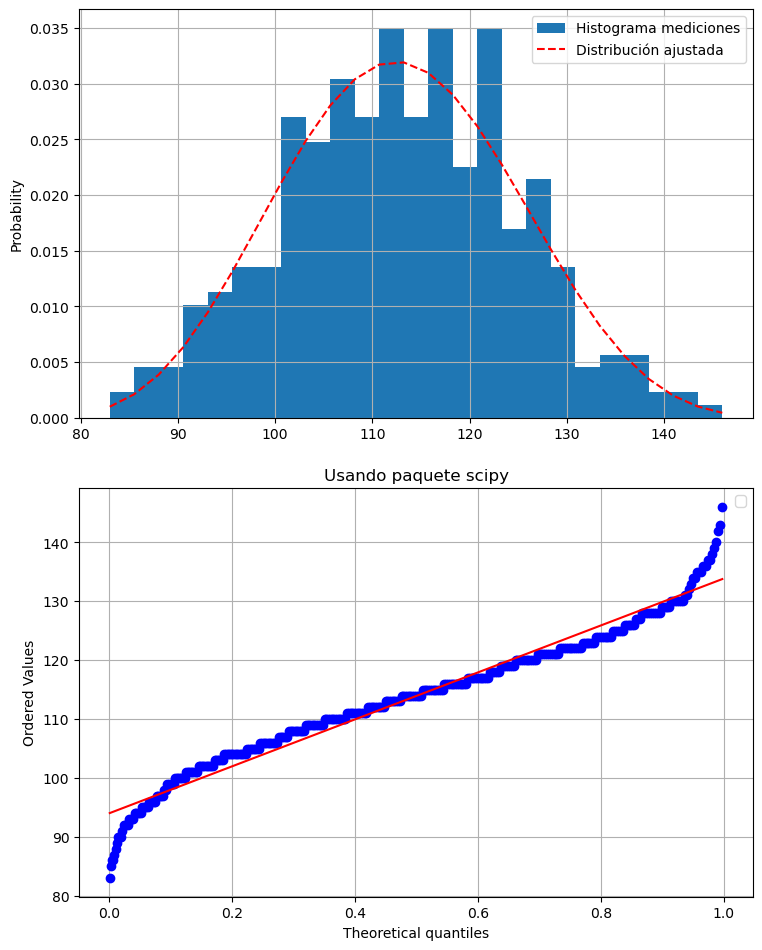

In [11]:
bins = 25
fig, ax = plt.subplots(2, 1, figsize = (8,10))
fig.tight_layout(pad = 3.0)

y, x, _ = ax[0].hist(lal_pts, bins, density=True, label='Histograma mediciones')

params = getattr(st, dist).fit(lal_pts)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

grap2 = st.probplot(lal_pts, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

### Montecarlo nodo 1

In [12]:
num_simulaciones = 100000

media_lalpts = lal_pts.mean()
desviacion_lalpts = lal_pts.std()

montecarlo_lalpts = np.random.normal(media_lalpts, desviacion_lalpts, num_simulaciones)
montecarlo_lalpts

array([102.25228188, 102.21563672, 128.52933111, ..., 113.30638029,
       123.60230391, 131.63749201])

### Reducción de varianza nodo 1

In [13]:
def reducir_varianza(datos):
    return np.log1p(datos)

montecarlo_lalpts_transformado = reducir_varianza(montecarlo_lalpts)

df_varianza1 = pd.DataFrame(columns=['Montecarlo_sin_transformacion', 'Montecarlo_con_transformacion'], dtype='float')
df_varianza1['Montecarlo_sin_transformacion'] = montecarlo_lalpts
df_varianza1['Montecarlo_con_transformacion'] = montecarlo_lalpts_transformado

df_varianza1

,Montecarlo_sin_transformacion,Montecarlo_con_transformacion
0,102.252282,4.637175
1,102.215637,4.636820
2,128.529331,4.863907
3,102.677635,4.641286
4,112.866261,4.735025
...,...,...
99995,114.971465,4.753344
99996,119.211147,4.789250
99997,113.306380,4.738882
99998,123.602304,4.825127


## Nodo 2: Porcentaje de triples de los Lakers

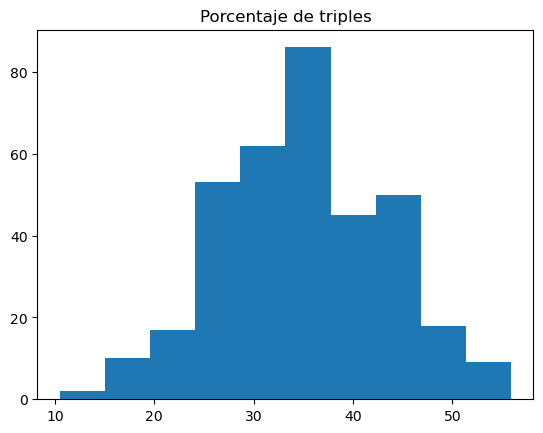

In [14]:
plt.hist(three_pts)
plt.title("Porcentaje de triples")
plt.show()

### KDE nodo 2

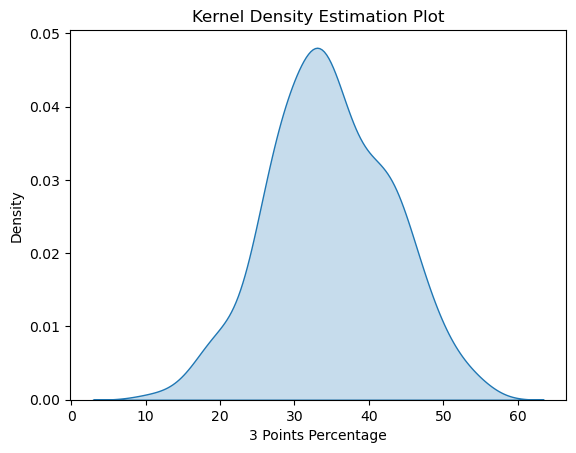

In [15]:
sns.kdeplot(data = three_pts, shade = True)
plt.title("Kernel Density Estimation Plot")
plt.xlabel("3 Points Percentage")
plt.ylabel("Density")
plt.show()

### Distribución óptima para el nodo 2

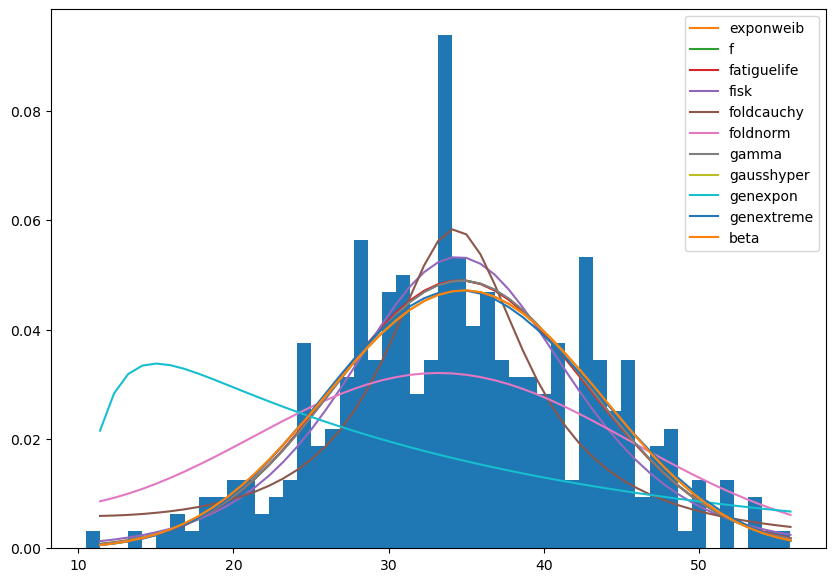

In [16]:
rv_continuas = [d_i for d_i in dir(st) if isinstance(getattr(st, d_i), getattr(st, 'rv_continuous'))]

fig, ax = plt.subplots(1, 1, figsize = (10,7))

y, x, _ = ax.hist(three_pts, bins = 50, density = True)
x = x[1:]

error = pd.DataFrame(columns = ['distribucion', 'error'])
i = 0
for d_i in rv_continuas[20:30] + ['beta']:
    try:
        params = getattr(st, d_i).fit(three_pts)
        data_hat = getattr(st, d_i).pdf(x, *params)
        ax.plot(x, data_hat, label = d_i)
        error.loc[i, :] = [d_i, np.mean((y - data_hat)**2)]
        i += 1
    except ValueError:
        pass

plt.legend()
error.set_index('distribucion', inplace=True)
error.sort_values('error', inplace=True)

In [17]:
error

,error
distribucion,
genextreme,0.000116
fatiguelife,0.000117
exponweib,0.000117
f,0.000117
gamma,0.000117
gausshyper,0.000118
beta,0.000118
fisk,0.000121
foldcauchy,0.000146


**La distribución genextreme es la que menos error tiene. Para saber si se acopla a nuestros datos haremos una comprobación.**

### Prueba de hipótesis nodo 2

**Hipótesis para genextreme**

$H_{0}$: es una distribución genextreme.

$H_{a}$: no es una distribución genextreme.

Nivel de significancia: ${\alpha} = 0.05$

Nivel de confianza: $1-{\alpha} = 0.95$

In [18]:
params_triples = st.genextreme.fit(three_pts)
params_triples

(0.2824127878364949, 31.900389505091418, 8.148309682571687)

In [19]:
st.kstest(three_pts, lambda three_pts: st.beta.cdf(three_pts, * params_triples))

KstestResult(statistic=1.0, pvalue=0.0)

**El p-value que tenemos es cero, por lo que no podemos aceptar la hipótesis nula, entonces el porcentaje de triples que anotan los Lakers no se distribuyen como genextreme. Intentaremos ahora con beta, ya que beta nos funcionó en el nodo anterior.**

**Hipótesis para beta**

$H_{0}$: es una distribución beta.

$H_{a}$: no es una distribución beta.

Nivel de significancia: ${\alpha} = 0.05$

Nivel de confianza: $1-{\alpha} = 0.95$

In [20]:
params_triples = st.beta.fit(three_pts)
params_triples

(10.278462809519382, 9.868783226317298, -3.4851069060782063, 75.00137699811079)

In [21]:
st.kstest(three_pts, lambda three_pts: st.beta.cdf(three_pts, * params_triples))

KstestResult(statistic=0.050670896780714514, pvalue=0.3159907306356463)

**El p-value que tenemos es mayor que el nivel de significancia, por lo que podemos aceptar la hipótesis nula, entonces el porcentaje de triples que anotan los Lakers que anotan los Lakers sí se distribuye como beta.**

### Ajuste PDF nodo 2

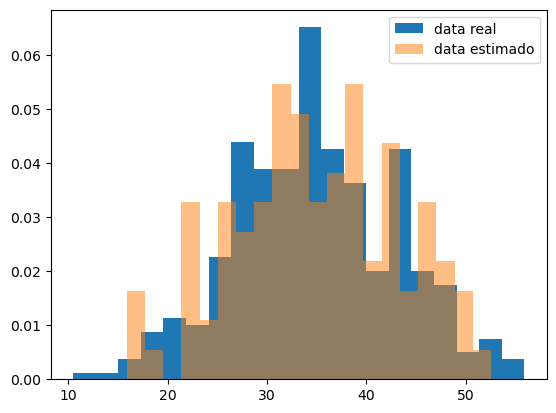

In [22]:
dist = 'beta'
params2 = getattr(st, dist).fit(three_pts)

random_hat2 = getattr(st, dist).rvs(*params2, size = 100)

plt.hist(three_pts, bins = 20, label = 'data real', density = True)
plt.hist(random_hat2, bins = 20, density = True, alpha = .5, label = 'data estimado')
plt.legend()
plt.show()

### Q-Q nodo 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


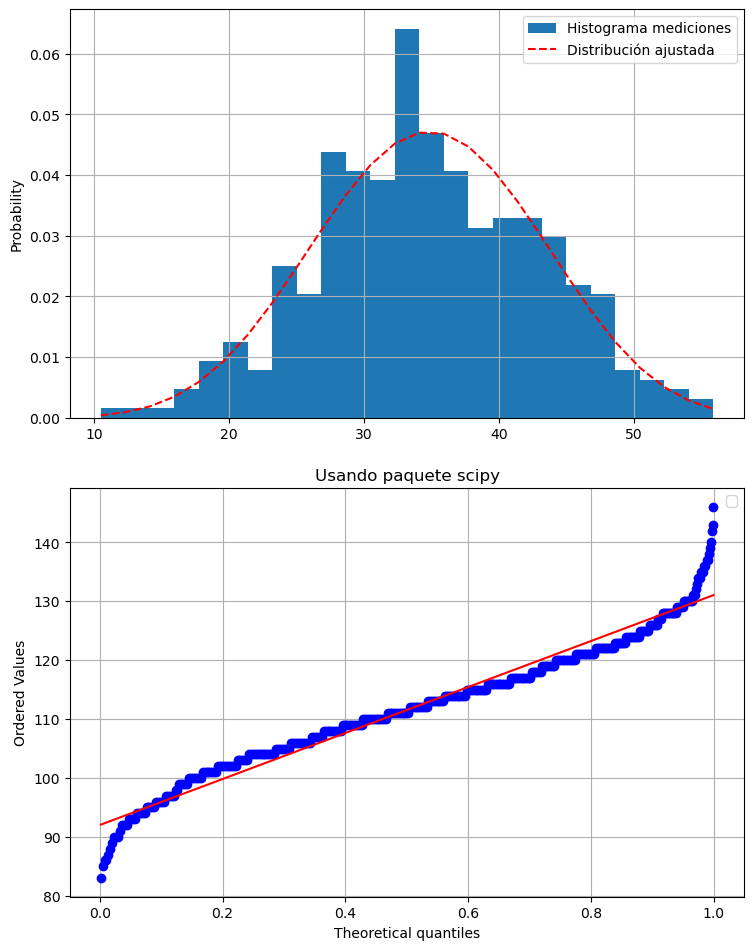

In [23]:
bins = 25
fig, ax = plt.subplots(2, 1, figsize = (8,10))
fig.tight_layout(pad = 3.0)

y, x, _ = ax[0].hist(three_pts, bins, density = True, label ='Histograma mediciones') 

params = getattr(st, dist).fit(three_pts)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()
ax[0].legend()

grap2 = st.probplot(lal_pts, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.legend()
plt.show()

## Montecarlo nodo 2

In [24]:
num_simulaciones = 100000

media_triples = three_pts.mean()
desviacion_triples = three_pts.std()

montecarlo_triples = np.random.normal(media_triples, desviacion_triples, num_simulaciones)
montecarlo_triples

array([37.30765422, 40.53536541, 33.58625249, ..., 35.3127783 ,
       22.08638425, 20.85146827])

### Reducción de varianza  nodo 2

In [25]:
montecarlo_triples_transformado = reducir_varianza(montecarlo_triples)

df_varianza2 = pd.DataFrame(columns=['Montecarlo_sin_transformacion', 'Montecarlo_con_transformacion'], dtype='float')
df_varianza2['Montecarlo_sin_transformacion'] = montecarlo_triples
df_varianza2['Montecarlo_con_transformacion'] = montecarlo_triples_transformado

df_varianza2

,Montecarlo_sin_transformacion,Montecarlo_con_transformacion
0,37.307654,3.645650
1,40.535365,3.726545
2,33.586252,3.543456
3,42.739555,3.778253
4,45.627718,3.842195
...,...,...
99995,29.722577,3.424998
99996,44.752502,3.823246
99997,35.312778,3.592170
99998,22.086384,3.139243


## Referencias

> 2022-23 Los Angeles Lakers Schedule | Basketball-Reference.com. (n.d.). Basketball-Reference.com. https://www.basketball-reference.com/teams/LAL/2023_games.html
> 2021-22 Los Angeles Lakers Schedule | Basketball-Reference.com. (n.d.). Basketball-Reference.com. https://www.basketball-reference.com/teams/LAL/2022_games.html
> 2020-21 Los Angeles Lakers Schedule | Basketball-Reference.com. (n.d.). Basketball-Reference.com. https://www.basketball-reference.com/teams/LAL/2021_games.html
> 2019-20 Los Angeles Lakers Schedule | Basketball-Reference.com. (n.d.). Basketball-Reference.com. https://www.basketball-reference.com/teams/LAL/2020_games.html
> Los Angeles Lakers team info and news | NBA.com. (n.d.). https://www.nba.com/stats/team/1610612747/boxscores-traditional

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>